In [1]:
!pip install -U pandasql

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf 

sql helper found here : https://www.analyticsvidhya.com/blog/2021/07/pandasql-best-way-to-run-sql-queries-and-codes-in-jupyter-notebook-using-python/

In [3]:
sns.set(style="whitegrid", palette="pastel")
%matplotlib inline
pd.set_option('display.max_columns', None)
mysql = lambda q: sqldf(q, globals())

# Initial Wrangling

In [4]:
# Loading Data
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')

In [5]:
bank_churners_df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119


In [6]:
bank_churners_df.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


In [7]:
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


In [8]:
bank_churners_df.shape

(10127, 10)

In [9]:
bank_churners_df.isna().sum().sum()

0

No Nulls in Bank Churners

In [10]:
basic_client_info_df.head()

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K
3,708085458,34,F,Uneducated,Single,Less than $40K
4,708086958,49,F,Uneducated,Married,Unknown


In [11]:
basic_client_info_df.describe()

,clientnum,customer_age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


In [12]:
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  int64 
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


In [13]:
basic_client_info_df.shape

(10127, 6)

In [14]:
basic_client_info_df.isna().sum().sum()

0

No Nulls in basic client info

In [15]:
enriched_churn_df.head()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36
3,828291858,6,1821,0.630,2381,0.481,40
4,828288333,4,659,0.938,3756,0.842,70


In [16]:
enriched_churn_df.describe()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [17]:
enriched_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   total_relationship_count  10127 non-null  int64  
 2   total_revolving_bal       10127 non-null  int64  
 3   total_amt_chng_q4_q1      10127 non-null  float64
 4   total_trans_amt           10127 non-null  int64  
 5   total_ct_chng_q4_q1       10127 non-null  float64
 6   total_trans_ct            10127 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


In [18]:
enriched_churn_df.shape

(10127, 7)

In [19]:
enriched_churn_df.isna().sum().sum()

0

No Nulls in enriched churn data

All three dataframes have the same number of rows and there are no missing values. The only thing needed is to change clientnum to strings and set the catagorical types to the correct datatype.

In [20]:
bank_churners_df["clientnum"]=bank_churners_df["clientnum"].apply(str)
basic_client_info_df["clientnum"]=basic_client_info_df["clientnum"].apply(str)
enriched_churn_df["clientnum"]=enriched_churn_df["clientnum"].apply(str)

In [21]:
basic_client_info_df.head()

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K
3,708085458,34,F,Uneducated,Single,Less than $40K
4,708086958,49,F,Uneducated,Married,Unknown


In [22]:
basic_client_info_df.education_level.value_counts().index

Index(['Graduate', 'High School', 'Unknown', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'],
      dtype='object')

In [23]:
basic_client_info_df.marital_status.value_counts().index

Index(['Married', 'Single', 'Unknown', 'Divorced'], dtype='object')

In [24]:
basic_client_info_df.income_category.value_counts().index

Index(['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K',
       'Unknown', '$120K +'],
      dtype='object')

In [25]:
bank_churners_df.card_category.value_counts().index

Index(['Blue', 'Silver', 'Gold', 'Platinum'], dtype='object')

In [26]:
bank_churners_df.attrition_flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

In [27]:
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  object
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(1), object(5)
memory usage: 474.8+ KB


In [28]:
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  object 
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 791.3+ KB


I decided to join the dataframes as I find it easier to work with one complete dataframe.

In [29]:
df_complete = bank_churners_df.merge(basic_client_info_df, how='inner', on='clientnum').merge(enriched_churn_df, how='inner', on='clientnum')

In [30]:
df_complete.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077,66,F,Doctorate,Married,Unknown,5,605,1.052,704,0.143,16
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119,68,M,Graduate,Married,Unknown,5,1652,1.255,1910,1.909,32


In [31]:
df_complete.shape

(10127, 21)

In [32]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  object 
 1   attrition_flag            10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   card_category             10127 non-null  object 
 4   months_on_book            10127 non-null  int64  
 5   months_inactive_12_mon    10127 non-null  int64  
 6   contacts_count_12_mon     10127 non-null  int64  
 7   credit_limit              10127 non-null  float64
 8   avg_open_to_buy           10127 non-null  float64
 9   avg_utilization_ratio     10127 non-null  float64
 10  customer_age              10127 non-null  int64  
 11  gender                    10127 non-null  object 
 12  education_level           10127 non-null  object 
 13  marital_status            10127 non-null  object 
 14  income

In [33]:
df_complete.income_category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

I want to work a lot with income category and I've decided to drop the rows that contain unknown incomes as it is going to interfere with my analysis.

In [34]:
df_complete = df_complete[df_complete['income_category'].str.contains('Unknown') == False]

In [35]:
df_complete.income_category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: income_category, dtype: int64

Create a new CSV to save my new complete dataframe.

In [36]:
df_complete.to_csv('bank_data.csv', index=False)

In [37]:
df = pd.read_csv('bank_data.csv')

In [38]:
# Change datatypes to catagorical values.
df['gender'] = df['gender'].astype('category')
df['education_level'] = df['education_level'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['income_category'] = df['income_category'].astype('category')
df['card_category'] = df['card_category'].astype('category')
df['attrition_flag'] = df['attrition_flag'].astype('category')

In [39]:
# I wanted to have a specific order to the catagories.
ed_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
ms_order = ['Unknown', 'Single', 'Married', 'Divorced']
ic_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
cc_order = ['Blue', 'Silver', 'Gold', 'Platinum']

In [40]:
# Setting my custom order.
df['education_level'] = df['education_level'].cat.set_categories(ed_order, ordered=True)
df['marital_status'] = df['marital_status'].cat.set_categories(ms_order, ordered=True)
df['income_category'] = df['income_category'].cat.set_categories(ic_order, ordered=True)
df['card_category'] = df['card_category'].cat.set_categories(cc_order, ordered=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 9015 non-null   int64   
 1   attrition_flag            9015 non-null   category
 2   dependent_count           9015 non-null   int64   
 3   card_category             9015 non-null   category
 4   months_on_book            9015 non-null   int64   
 5   months_inactive_12_mon    9015 non-null   int64   
 6   contacts_count_12_mon     9015 non-null   int64   
 7   credit_limit              9015 non-null   float64 
 8   avg_open_to_buy           9015 non-null   float64 
 9   avg_utilization_ratio     9015 non-null   float64 
 10  customer_age              9015 non-null   int64   
 11  gender                    9015 non-null   category
 12  education_level           9015 non-null   category
 13  marital_status            9015 non-null   catego

# Summary Statistics and Short Analysis

In [42]:
df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
3,717296808,Existing Customer,1,Blue,56,3,2,3006.0,489.0,0.837,67,F,Graduate,Married,Less than $40K,4,2517,2.053,1661,1.000,32
4,809164083,Existing Customer,1,Blue,56,1,2,2619.0,840.0,0.679,63,M,Graduate,Married,$40K - $60K,2,1779,1.259,1450,0.947,37


In [43]:
df.attrition_flag.value_counts()

Existing Customer    7575
Attrited Customer    1440
Name: attrition_flag, dtype: int64

In [44]:
df.gender.value_counts()

M    4717
F    4298
Name: gender, dtype: int64

In [45]:
df.marital_status.value_counts()

Married     4194
Single      3499
Unknown      667
Divorced     655
Name: marital_status, dtype: int64

In [46]:
df.income_category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: income_category, dtype: int64

In [47]:
mysql("SELECT income_category, credit_limit as top_10_biggest_credit FROM df ORDER BY 2 DESC LIMIT 10;")

,income_category,top_10_biggest_credit
0,$80K - $120K,34516.0
1,$60K - $80K,34516.0
2,$80K - $120K,34516.0
3,$80K - $120K,34516.0
4,$120K +,34516.0
5,$120K +,34516.0
6,$120K +,34516.0
7,$120K +,34516.0
8,$120K +,34516.0
9,$80K - $120K,34516.0


Here we can see that the top 10 credit limit clients are in the top income categories.

In [48]:
mysql("SELECT income_category, total_trans_amt as top_10_spenders FROM df ORDER BY 2 DESC LIMIT 10;")

,income_category,top_10_spenders
0,$60K - $80K,18484
1,$60K - $80K,17995
2,$40K - $60K,17744
3,$60K - $80K,17634
4,Less than $40K,17628
5,$80K - $120K,17498
6,Less than $40K,17437
7,$40K - $60K,17390
8,$80K - $120K,17350
9,$80K - $120K,17258


Interestingly the top 10 spenders in the last 12 months are not in the highest income categories.

In [49]:
mysql("SELECT count(total_revolving_bal) as total_with_0_credit_balance FROM df WHERE total_revolving_bal = 0;")

,total_with_0_credit_balance
0,2167


In [50]:
mysql("SELECT count(total_trans_amt) as total_with_0_transactions FROM df WHERE total_trans_amt = 0;")

,total_with_0_transactions
0,0


In [51]:
df.dependent_count.value_counts()

3    2442
2    2377
1    1630
4    1400
0     782
5     384
Name: dependent_count, dtype: int64

In [52]:
df.card_category.value_counts()

Blue        8391
Silver       502
Gold         107
Platinum      15
Name: card_category, dtype: int64

In [53]:
df.months_inactive_12_mon.value_counts()

3    3410
2    2959
1    1982
4     374
5     159
6     108
0      23
Name: months_inactive_12_mon, dtype: int64

In [54]:
df.contacts_count_12_mon.value_counts()

3    2992
2    2877
1    1328
4    1250
0     363
5     161
6      44
Name: contacts_count_12_mon, dtype: int64

## So far, nothing seems to be out of the limits in this section. We will see if anything else comes up in the next section.

In [55]:
df.head(0)

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct


# Outlier Detections and Distribution Analysis

Created a function to make histograms for faster exploration

In [56]:
def make_hist(df, column, bins, color, x_label):
    fig, ax = plt.subplots()
    plt.hist(data=df, x=column, bins=bins, color=color)
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    return ax

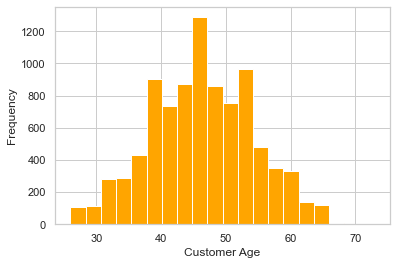

In [57]:
make_hist(df, 'customer_age', 20, 'orange', 'Customer Age');

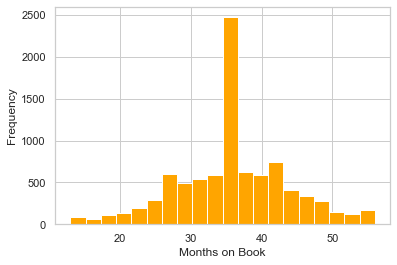

In [58]:
make_hist(df, 'months_on_book', 20, 'orange', 'Months on Book');

In [59]:
df.months_on_book.value_counts()

36    2187
37     320
34     314
38     310
39     303
35     287
40     286
31     282
33     280
30     273
32     262
41     261
43     252
28     249
42     236
29     218
44     207
45     204
46     180
27     177
26     169
47     155
48     148
25     146
24     139
49     125
23     103
22      93
56      89
50      84
53      73
21      70
20      70
51      67
19      60
52      54
18      50
13      50
54      48
17      37
55      32
16      25
15      25
14      15
Name: months_on_book, dtype: int64

### The months_on_books column has a much higher proportion of values at 36 months. I can't really consider this an outlier as it is how the data is but it must be considered in the analysis.

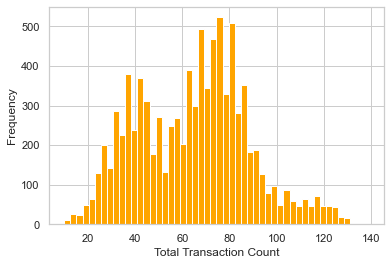

In [60]:
make_hist(df, 'total_trans_ct', 50, 'orange', 'Total Transaction Count');

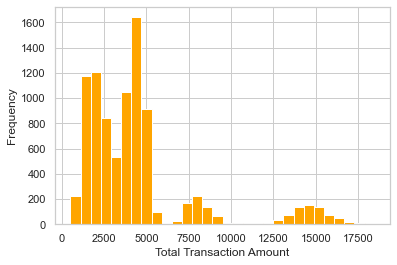

In [61]:
make_hist(df, 'total_trans_amt', 30, 'orange', 'Total Transaction Amount');

### The total_trans_amt column has distinct groupings of values which I will look at further to see if this correlates to any other column.

Made a countplot function.

In [62]:
def make_cnt(df, column, color, title, rot):
    fig, ax = plt.subplots()
    sns.countplot(data=df, x=column, color=color)
    ax.title.set_text(title)
    ax.set(xlabel='')
    ax.tick_params(labelrotation=rot)
    return ax

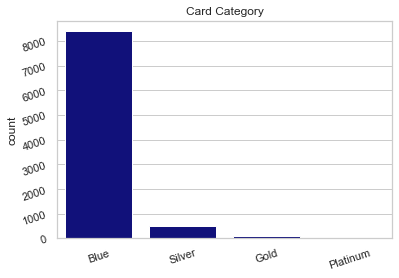

In [63]:
make_cnt(df, 'card_category', 'darkblue', 'Card Category', 18);

In [64]:
df.card_category.value_counts()

Blue        8391
Silver       502
Gold         107
Platinum      15
Name: card_category, dtype: int64

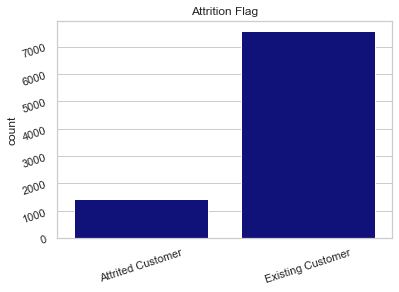

In [65]:
make_cnt(df, 'attrition_flag', 'darkblue', 'Attrition Flag', 18);

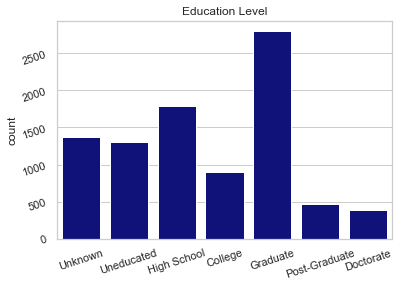

In [66]:
make_cnt(df, 'education_level', 'darkblue', 'Education Level', 18);

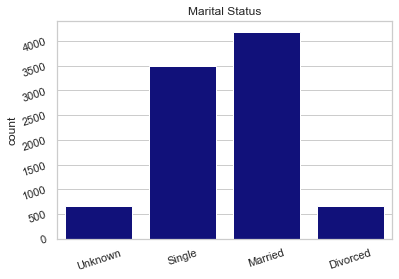

In [67]:
make_cnt(df, 'marital_status', 'darkblue', 'Marital Status', 18);

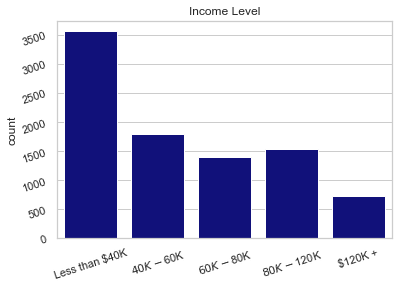

In [68]:
make_cnt(df, 'income_category', 'darkblue', 'Income Level', 18);

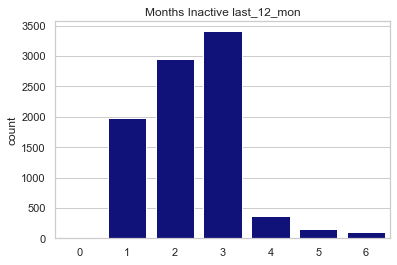

In [69]:
make_cnt(df, 'months_inactive_12_mon', 'darkblue', 'Months Inactive last_12_mon', 0);

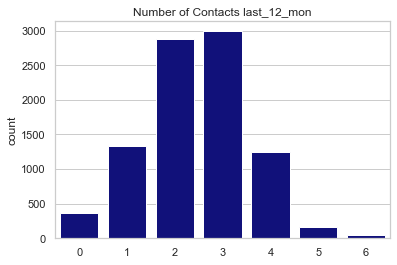

In [70]:
make_cnt(df, 'contacts_count_12_mon', 'darkblue', 'Number of Contacts last_12_mon', 0);

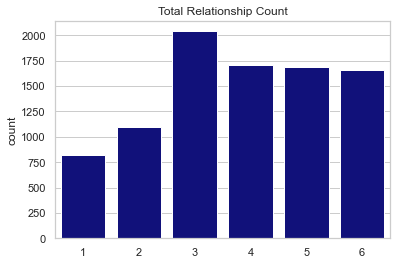

In [71]:
make_cnt(df, 'total_relationship_count', 'darkblue', 'Total Relationship Count', 0);

In [72]:
df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
3,717296808,Existing Customer,1,Blue,56,3,2,3006.0,489.0,0.837,67,F,Graduate,Married,Less than $40K,4,2517,2.053,1661,1.000,32
4,809164083,Existing Customer,1,Blue,56,1,2,2619.0,840.0,0.679,63,M,Graduate,Married,$40K - $60K,2,1779,1.259,1450,0.947,37


BoxPlot Function

In [73]:
def make_box(df, column, color, title):
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x=column, color=color)
    ax.title.set_text(title)
    return ax

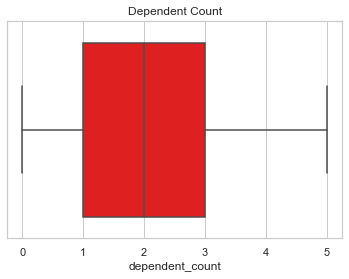

In [74]:
make_box(df, 'dependent_count', 'red', 'Dependent Count');

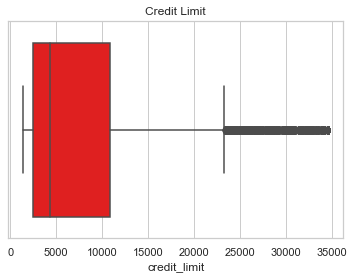

In [75]:
make_box(df, 'credit_limit', 'red', 'Credit Limit');

In [76]:
df.credit_limit.describe()

count     9015.000000
mean      8522.834764
std       9132.702996
min       1438.300000
25%       2505.500000
50%       4331.000000
75%      10808.000000
max      34516.000000
Name: credit_limit, dtype: float64

In [77]:
mysql("SELECT count(credit_limit) as total_over_20k FROM df WHERE credit_limit > 20000;")

,total_over_20k
0,1124


In [78]:
mysql("SELECT count(credit_limit) as total_over_30k FROM df WHERE credit_limit > 30000;")

,total_over_30k
0,601


About 10% of the values in the credit_limit column are over 20k and about 5% are above 30k so they cannot be considered outliers.

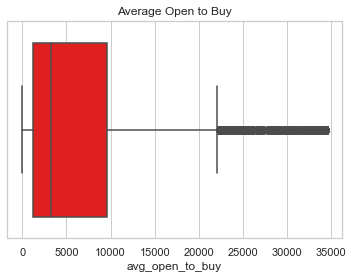

In [79]:
make_box(df, 'avg_open_to_buy', 'red', 'Average Open to Buy');

In [80]:
df.avg_open_to_buy.describe()

count     9015.000000
mean      7354.130826
std       9135.277242
min          3.000000
25%       1240.000000
50%       3276.000000
75%       9574.000000
max      34516.000000
Name: avg_open_to_buy, dtype: float64

In [81]:
mysql("SELECT count(avg_open_to_buy) as total_over_20k FROM df WHERE avg_open_to_buy > 20000;")

,total_over_20k
0,1041


In [82]:
mysql("SELECT count(avg_open_to_buy) as total_over_30k FROM df WHERE avg_open_to_buy > 30000;")

,total_over_30k
0,560


The same as credit_limit, avg_open_to_buy has a lot values in the upper ranges that cannot be considered outliers.

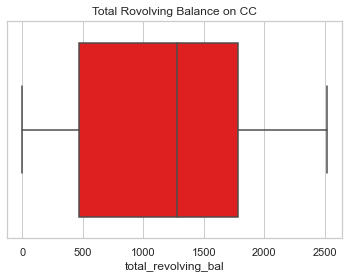

In [83]:
make_box(df, 'total_revolving_bal', 'red', 'Total Rovolving Balance on CC');

In [84]:
df.total_revolving_bal.describe()

count    9015.000000
mean     1168.703938
std       813.063816
min         0.000000
25%       466.000000
50%      1281.000000
75%      1783.500000
max      2517.000000
Name: total_revolving_bal, dtype: float64

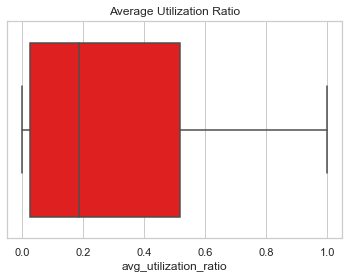

In [85]:
make_box(df, 'avg_utilization_ratio', 'red', 'Average Utilization Ratio');

In [86]:
df.avg_utilization_ratio.describe()

count    9015.000000
mean        0.281565
std         0.278482
min         0.000000
25%         0.026000
50%         0.185000
75%         0.516000
max         0.999000
Name: avg_utilization_ratio, dtype: float64

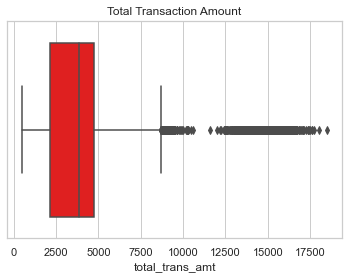

In [87]:
make_box(df, 'total_trans_amt', 'red', 'Total Transaction Amount');

In [88]:
df.total_trans_amt.describe()

count     9015.000000
mean      4419.119578
std       3450.979966
min        510.000000
25%       2118.000000
50%       3868.000000
75%       4743.500000
max      18484.000000
Name: total_trans_amt, dtype: float64

In [89]:
mysql("SELECT count(total_trans_amt) as total_over_15k FROM df WHERE total_trans_amt > 15000;")

,total_over_15k
0,261


### In total_trans_amt there are 285 values over 15k which could be considered outliers but as before, with this kind of dataset we can expect these kind of high totals and therefore I will leave them in.

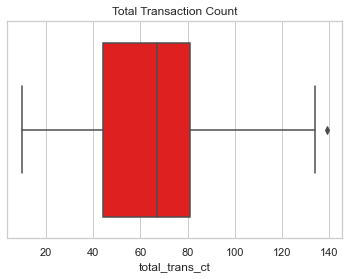

In [90]:
make_box(df, 'total_trans_ct', 'red', 'Total Transaction Count');

In [91]:
df.total_trans_ct.describe()

count    9015.000000
mean       64.686966
std        23.681983
min        10.000000
25%        44.000000
50%        67.000000
75%        81.000000
max       139.000000
Name: total_trans_ct, dtype: float64

## In summary, though some of the columns may appear to have some outliers, I don't think it's necessary to remove them as they are a feature of this dataset. We are dealing with credit limits in a bank and of course we can expect people in a very wealthy income bracket to have a really high credit limit among other things. This is something I am going to explore further. Overall this is very clean dataset with no serious issues. I may return to cleaning upon further analysis.

# Cross-Correlation Analysis

## Demographics Exploration

### What is the effect of the different demographics on Total Transaction Amount?

In [92]:
df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
3,717296808,Existing Customer,1,Blue,56,3,2,3006.0,489.0,0.837,67,F,Graduate,Married,Less than $40K,4,2517,2.053,1661,1.000,32
4,809164083,Existing Customer,1,Blue,56,1,2,2619.0,840.0,0.679,63,M,Graduate,Married,$40K - $60K,2,1779,1.259,1450,0.947,37


Create violin plot function as I'm going to use this several times.

In [93]:
def create_violinplots(df, y_col, title, x_labels, y_label, cols):
    fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))

    sns.violinplot(data=df, x=cols[0], y=y_col, inner='quartile', ax=ax[0])
    ax[0].set_title(x_labels[0])
    ax[0].set_xlabel('')
    ax[0].set_ylabel(y_label)

    sns.violinplot(data=df, x=cols[1], y=y_col, inner='quartile', ax=ax[1])
    ax[1].set_title(x_labels[1])
    ax[1].set_xlabel('')
    ax[1].set_ylabel(y_label)

    sns.violinplot(data=df, x=cols[2], y=y_col, inner='quartile', ax=ax[2])
    ax[2].set_title(x_labels[2])
    ax[2].set_xlabel('')
    ax[2].set_ylabel(y_label)
    
    sns.violinplot(data=df, x=cols[3], y=y_col, inner='quartile', ax=ax[3])
    ax[3].set_title(x_labels[3])
    ax[3].set_xlabel('')
    ax[3].set_ylabel(y_label)
    
    sns.violinplot(data=df, x=cols[4], y=y_col, inner='quartile', ax=ax[4])
    ax[4].set_title(x_labels[4])
    ax[4].set_xlabel('')
    ax[4].set_ylabel(y_label)
        
    sns.violinplot(data=df, x=cols[5], y=y_col, inner='quartile', ax=ax[5])
    ax[5].set_title(x_labels[5])
    ax[5].set_xlabel('')
    ax[5].set_ylabel(y_label)

    fig.suptitle(title, fontsize=16)
    plt.show()

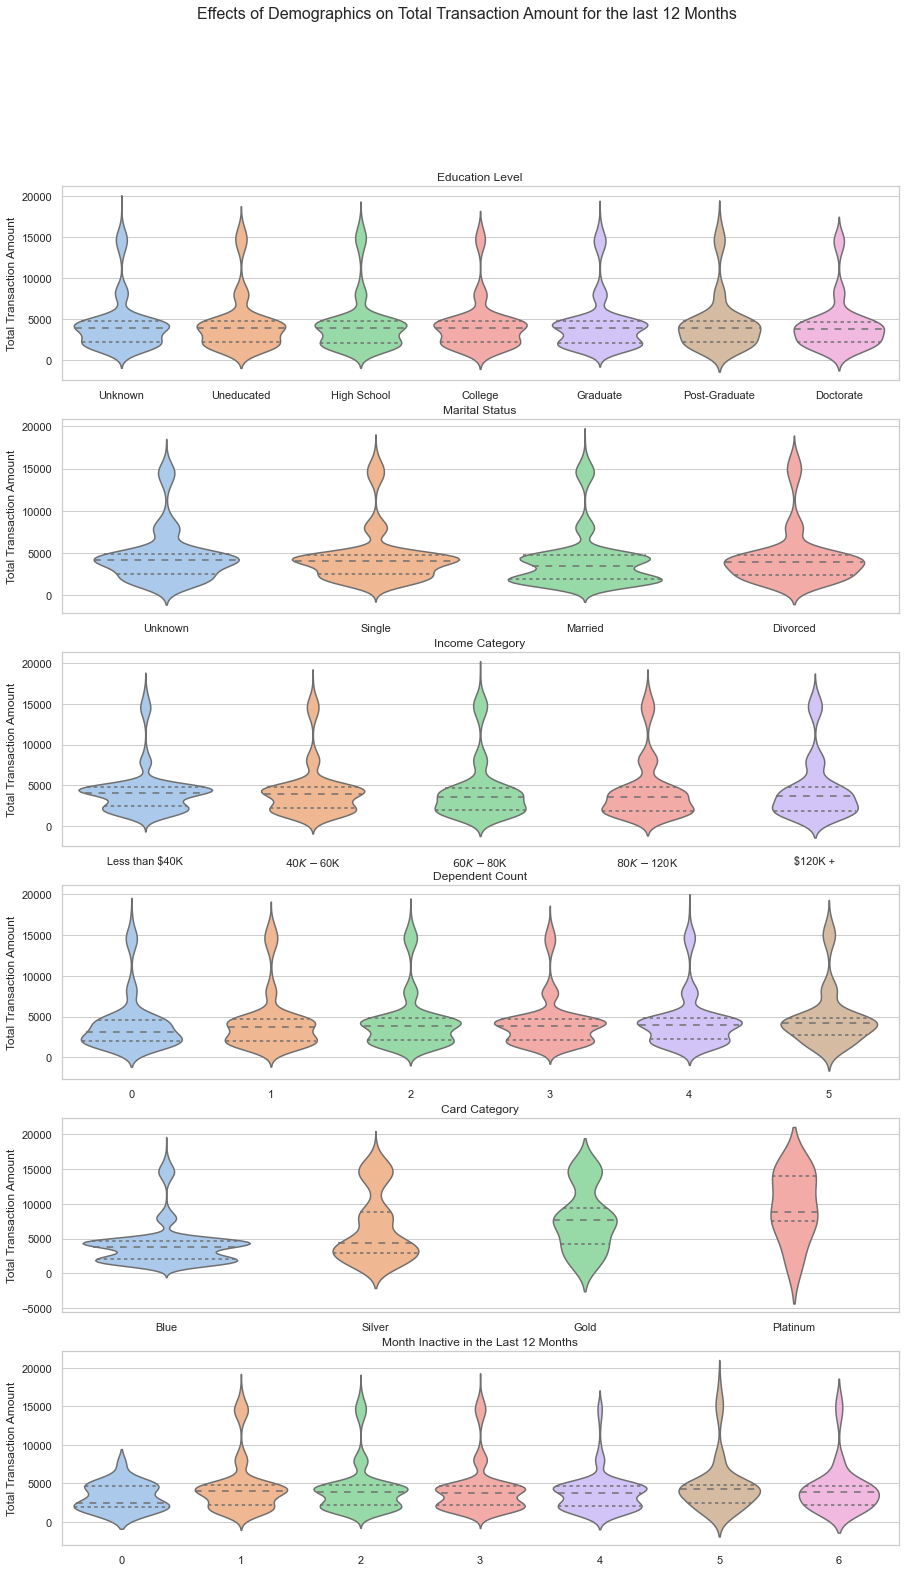

In [94]:
create_violinplots(df, 'total_trans_amt', 
                   "Effects of Demographics on Total Transaction Amount for the last 12 Months", 
                   ['Education Level', 'Marital Status', 'Income Category', 'Dependent Count', 'Card Category', 'Month Inactive in the Last 12 Months'], 
                   'Total Transaction Amount', 
                   ['education_level', 'marital_status', 'income_category', 'dependent_count', 'card_category', 'months_inactive_12_mon'])


### I wanted to create several violin plots to compare the demographics of the dataset against a variety of columns. In this one I have compared total transaction amount for the year. The only notable difference here is with card category which probably due to the much higher number of blue card holders than the other card types. Knowing this, we can expect all the plots with card category to be this way. Apart from that, we can also note that the clients that had 0 inactive months didn't pass 10k in total transactions whereas all other categories did.

### What is the effect of the different demographics on Credit Limit?

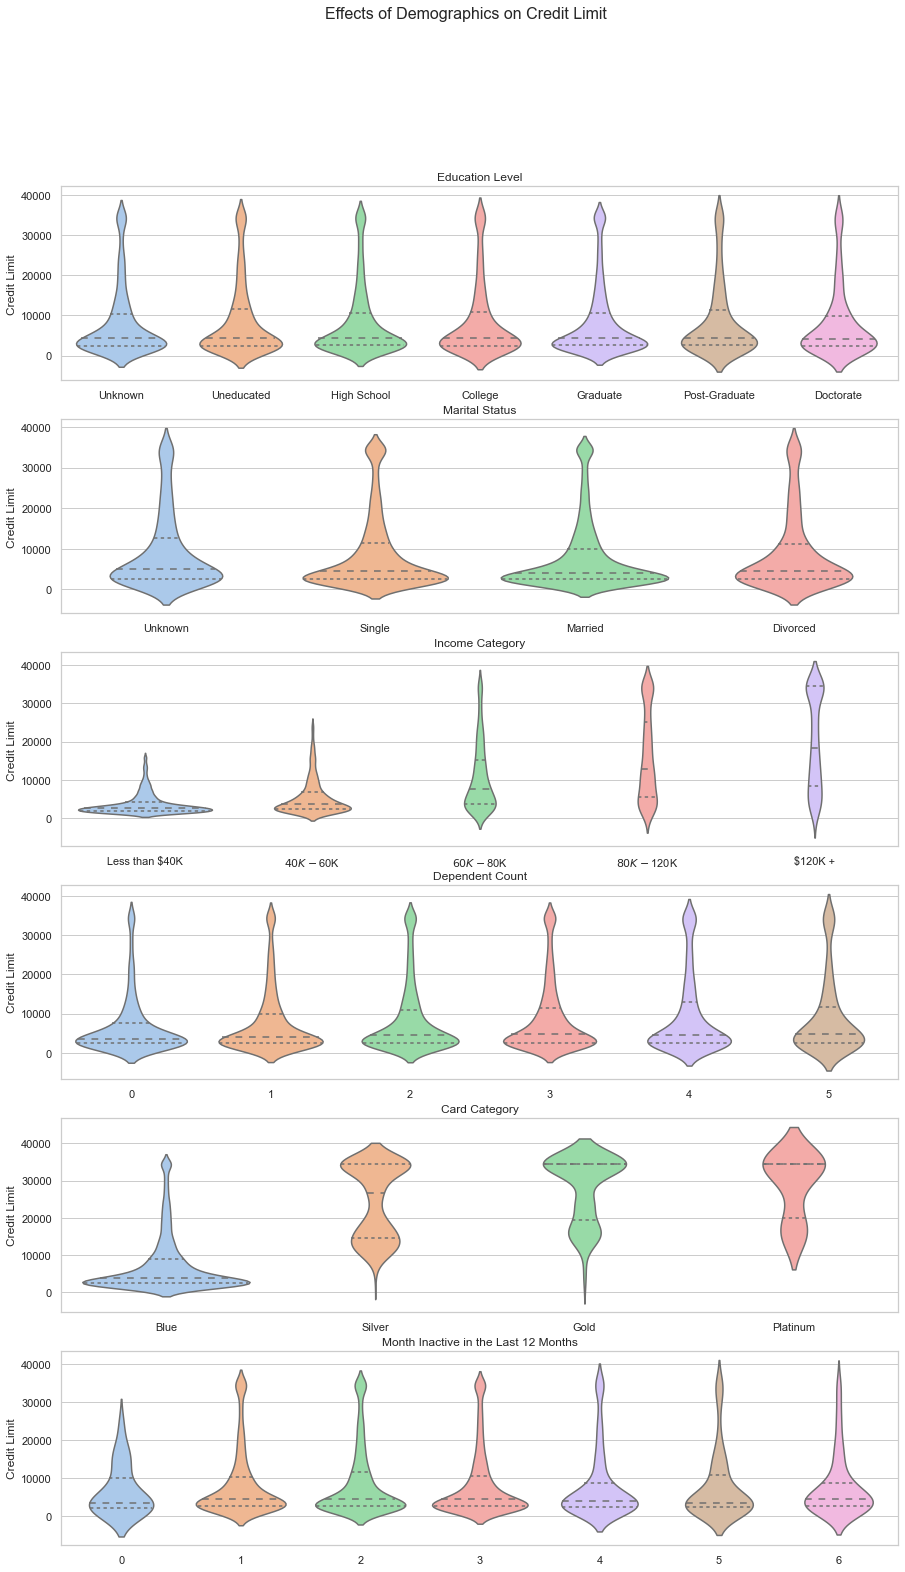

In [95]:
create_violinplots(df, 'credit_limit', 
                   "Effects of Demographics on Credit Limit", 
                   ['Education Level', 'Marital Status', 'Income Category', 'Dependent Count', 'Card Category', 'Month Inactive in the Last 12 Months'], 
                   'Credit Limit', 
                   ['education_level', 'marital_status', 'income_category', 'dependent_count', 'card_category', 'months_inactive_12_mon'])


### Here I used the same parameters as before but against credit limit. You can see that higher income categories have a higher credit limit which makes sense as banks usually assign higher credit limits to people with higher incomes.

### What is the effect of the different demographics on Average Credit Card Utilization?

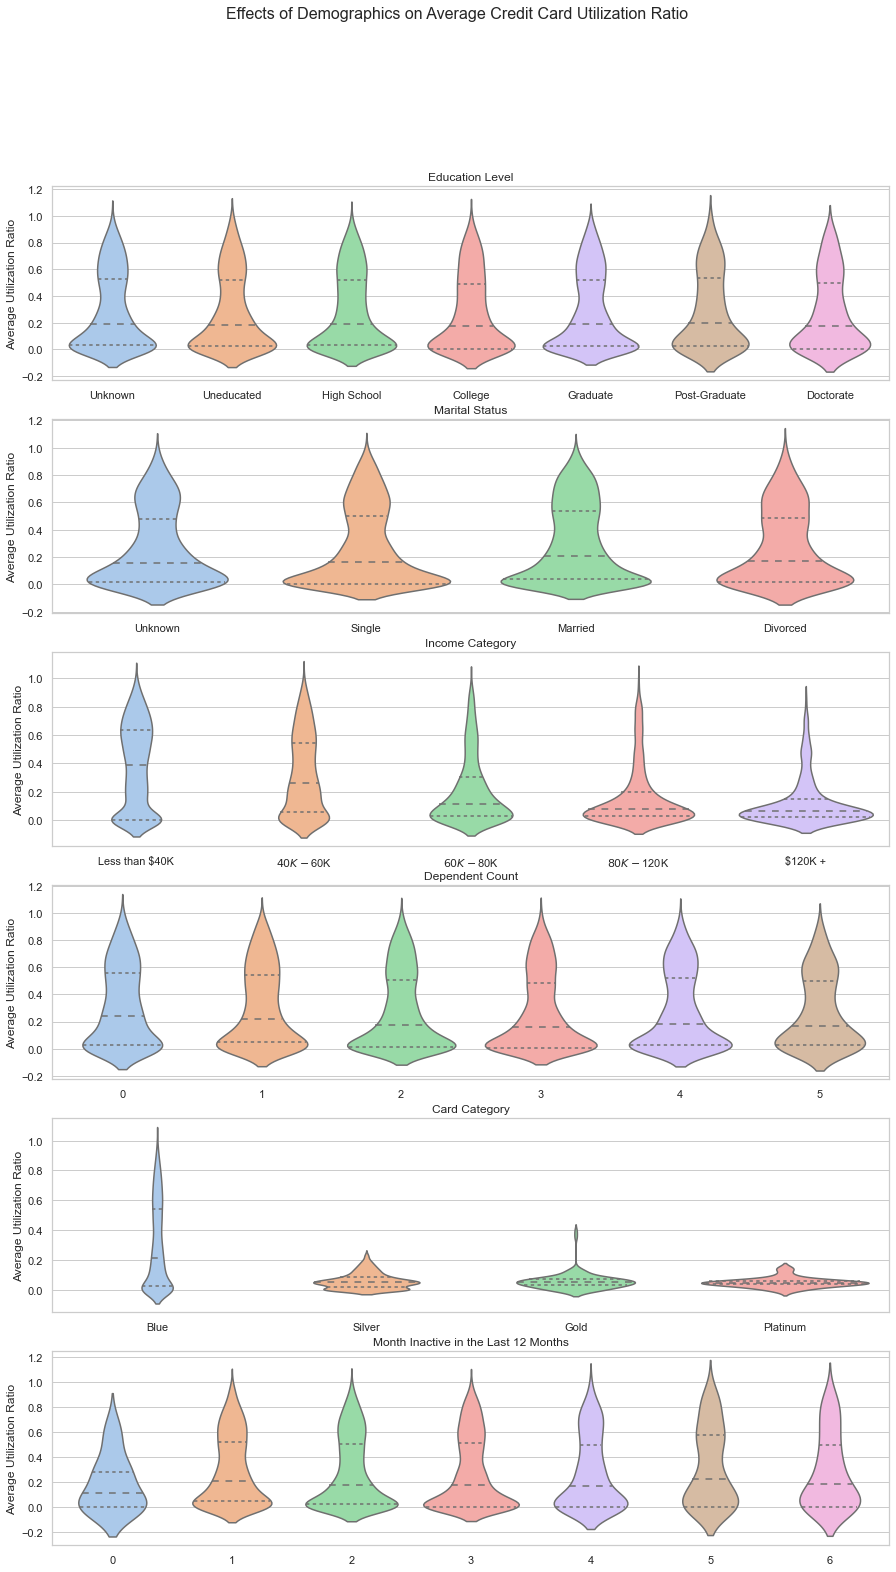

In [96]:
create_violinplots(df, 'avg_utilization_ratio', 
                   "Effects of Demographics on Average Credit Card Utilization Ratio", 
                   ['Education Level', 'Marital Status', 'Income Category', 'Dependent Count', 'Card Category', 'Month Inactive in the Last 12 Months'], 
                   'Average Utilization Ratio', 
                   ['education_level', 'marital_status', 'income_category', 'dependent_count', 'card_category', 'months_inactive_12_mon'])

### Comparing against Average Utilization Ratio, we can see that income category can have an impact. This makes sense as we already know that the higher the income, the higher the credit limit. As it is a ratio of that limit when can expect the higher incomes to have a lower ratio. 

### What is the effect of the demographics on Average Credit Available to Customers?

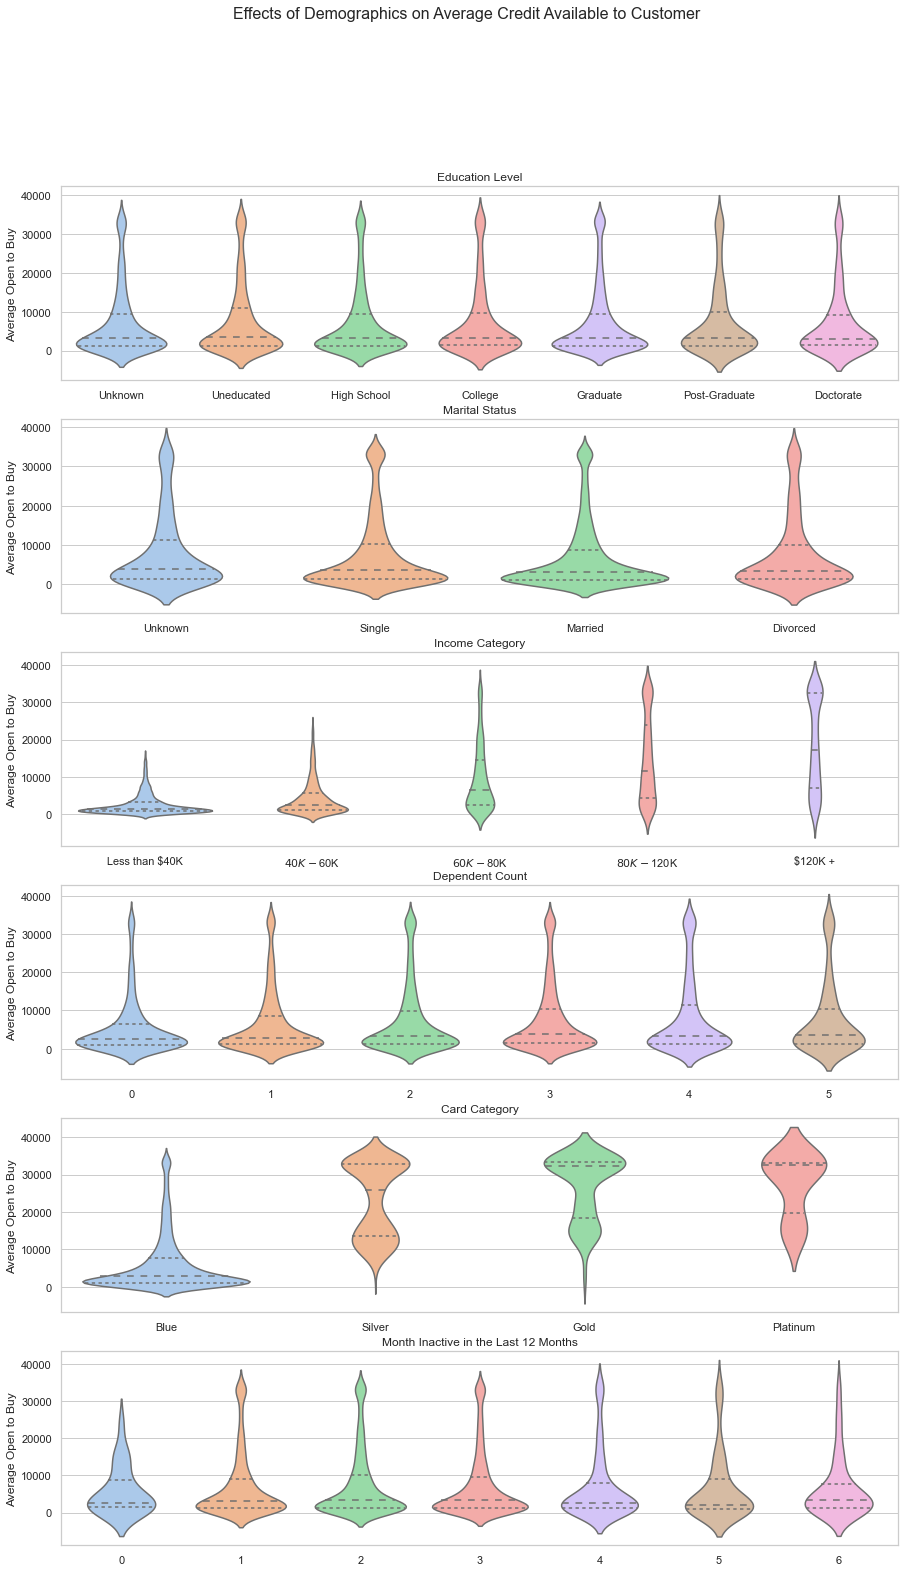

In [97]:
create_violinplots(df, 'avg_open_to_buy', 
                   "Effects of Demographics on Average Credit Available to Customer", 
                   ['Education Level', 'Marital Status', 'Income Category', 'Dependent Count', 'Card Category', 'Month Inactive in the Last 12 Months'], 
                   'Average Open to Buy', 
                   ['education_level', 'marital_status', 'income_category', 'dependent_count', 'card_category', 'months_inactive_12_mon'])

### Checking against the average remaining credit available to customers, again we see income category has an effect. The higher income categories have more credit available, this is more likely due to them having higher credit limits than them actually using less credit than lower income categories.

## Checking columns for any correlation.

### Here I made a heatmap to help me decide which variables have a strong correlation. 

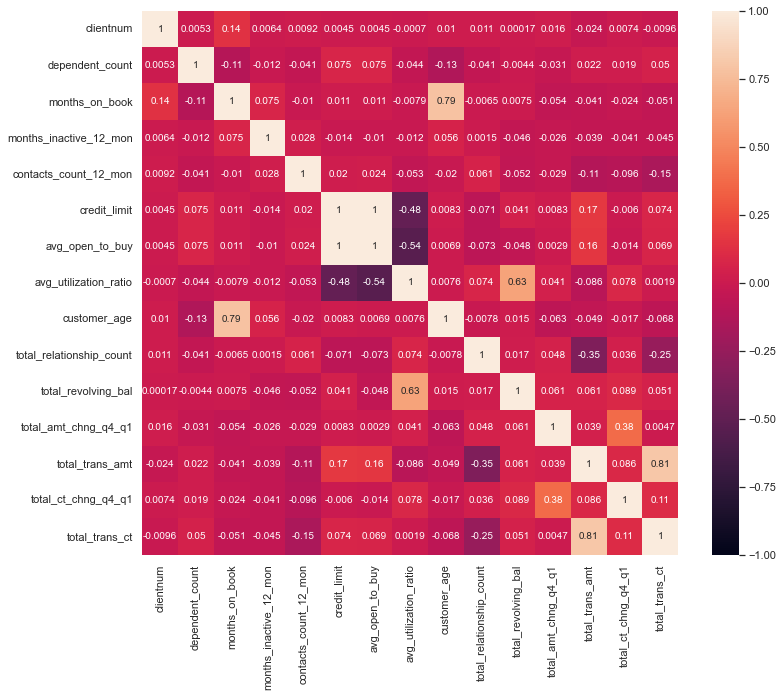

In [98]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.show()

### How do the different columns related to credit effect each other and does this have any relation to attrition flag?

Text(0.5, 1.05, 'Relationship between Dependent Count, Credit Limit, Open To Buy, and Utilization Ratio with Attrition Flag')

<Figure size 864x720 with 0 Axes>

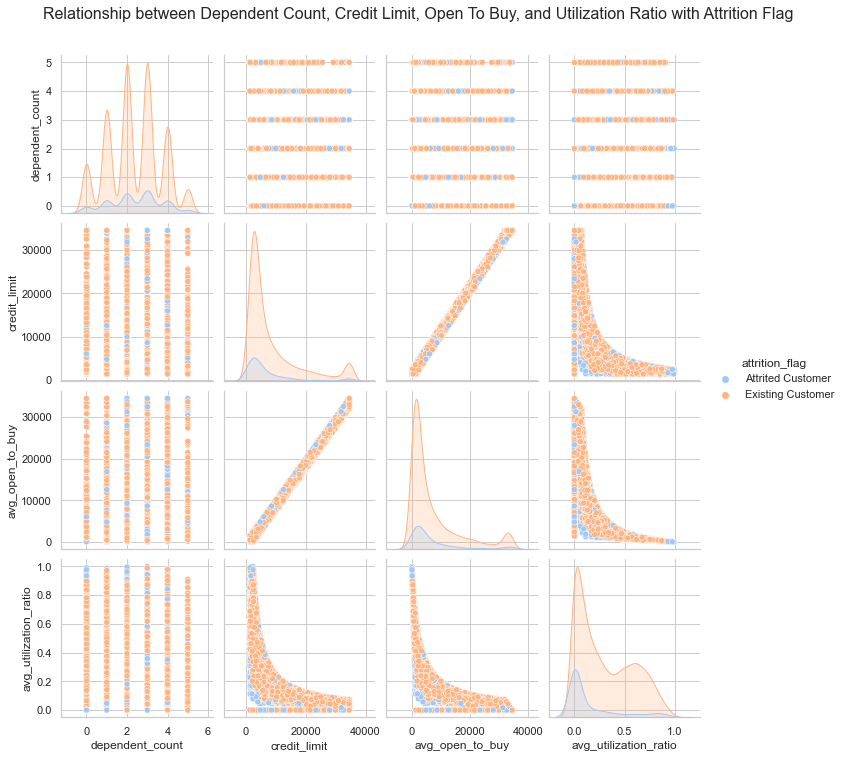

In [99]:
plt.figure(figsize=(12,10))
sns.pairplot(df, vars=['dependent_count', 'credit_limit', 'avg_open_to_buy', 'avg_utilization_ratio'], hue='attrition_flag')
plt.suptitle('Relationship between Dependent Count, Credit Limit, Open To Buy, and Utilization Ratio with Attrition Flag', fontsize=16, y=1.05)


### Here I created a pairplot to check all the variables related to credit to see the relationships. I will use this to decide which variables to focus on later. Overall I'm not seeing any relation between attrition flag and these variables. It is interesting to see how credit_limit, avg_open_to_buy and avg_utilization_ratio correlate. 

### How does credit limit effect the customers use of that credit?

Create a scatterplot function.

In [100]:
def plot_scatter(data, x_col, y_col, hue, title):
    plt.figure(figsize=(12,10))
    sns.scatterplot(x=x_col, y=y_col, hue=hue, data=data)
    plt.title(title, fontsize=16)
    plt.show()

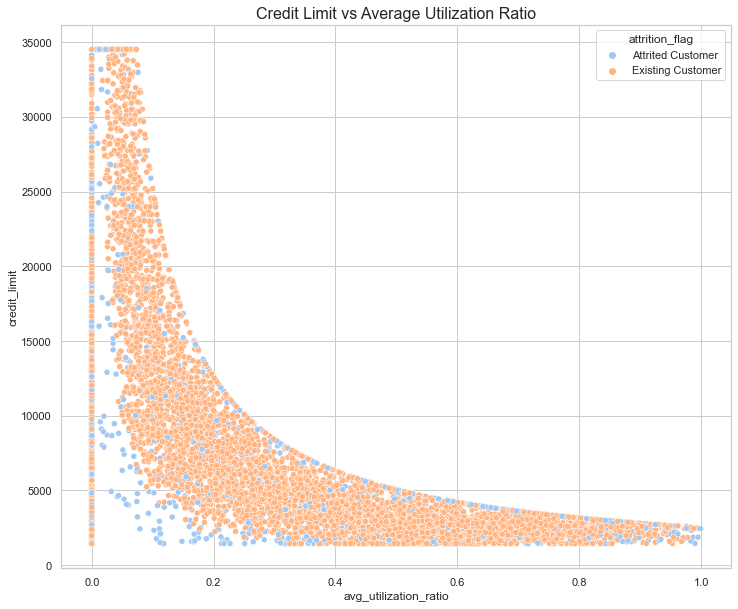

In [101]:
plot_scatter(df, 'avg_utilization_ratio', 'credit_limit', 'attrition_flag', 'Credit Limit vs Average Utilization Ratio')

### With this scatterplot we can see a right-skewed distribution with a moderate negative correlation.

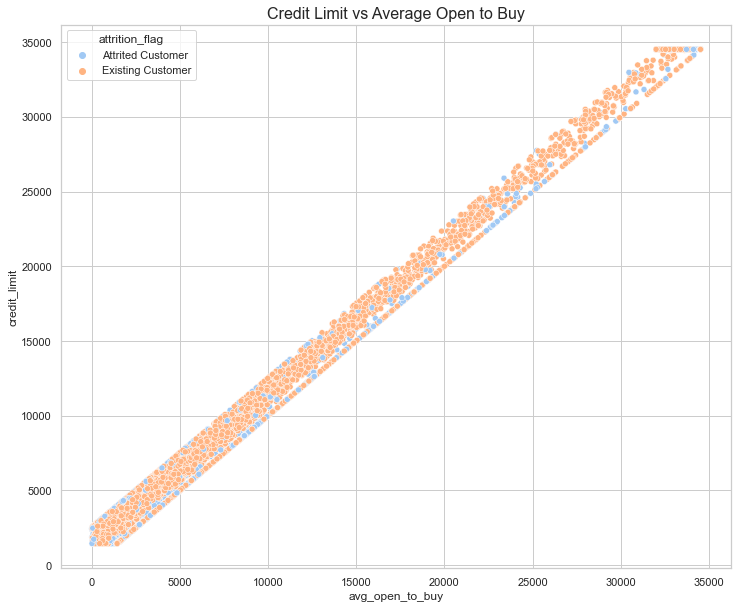

In [102]:
plot_scatter(df, 'avg_open_to_buy', 'credit_limit', 'attrition_flag', 'Credit Limit vs Average Open to Buy')

In [103]:
df.avg_open_to_buy.describe()

count     9015.000000
mean      7354.130826
std       9135.277242
min          3.000000
25%       1240.000000
50%       3276.000000
75%       9574.000000
max      34516.000000
Name: avg_open_to_buy, dtype: float64

In [104]:
df.avg_utilization_ratio.describe()

count    9015.000000
mean        0.281565
std         0.278482
min         0.000000
25%         0.026000
50%         0.185000
75%         0.516000
max         0.999000
Name: avg_utilization_ratio, dtype: float64

### Here we can see credit limit and average open to buy have a perfect positive correlation. This is quite unusual and indicates that clients are not using much of their available credit at the bank. Perhaps the bank is offering too much credit where it is not needed. 50% of the clients at the bank fall below 18.5% utilization of their credit with an average use of 28%. 

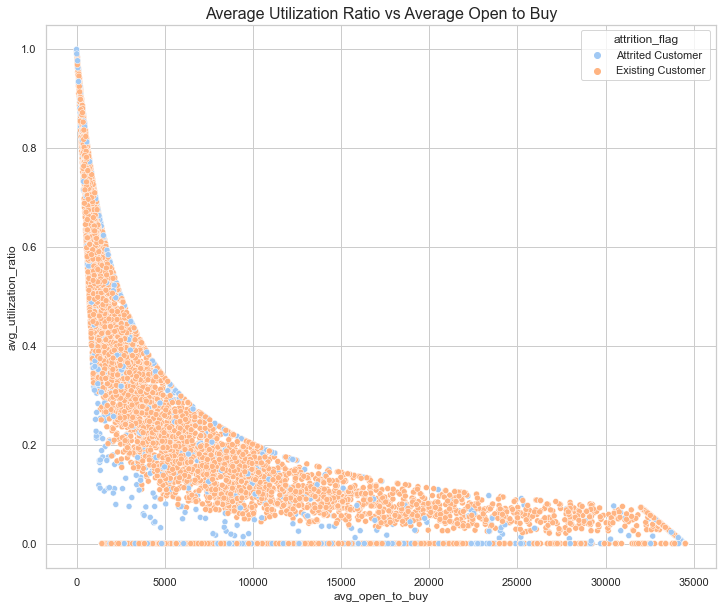

In [105]:
plot_scatter(df, 'avg_open_to_buy', 'avg_utilization_ratio', 'attrition_flag', 'Average Utilization Ratio vs Average Open to Buy')

### With this scatterplot we can see a right-skewed distribution with a moderate negative correlation.

### I created three larger scatterplots so it would be clearer to see the effects. While we can see a correlation between the different variables that relate to credit, we can't note any concentration of the colors related to attrition flag so we can conclude that for this dataset there is no effect of these variables on attrition flag.

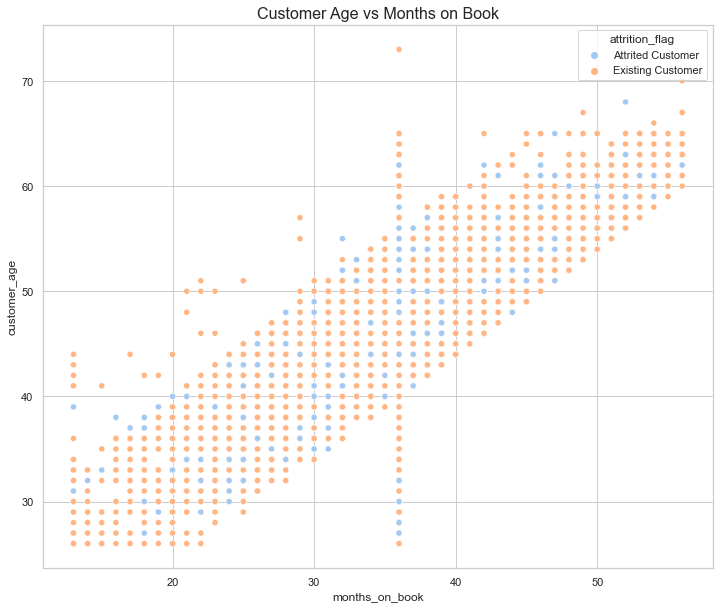

In [106]:
plot_scatter(df, 'months_on_book', 'customer_age', 'attrition_flag', 'Customer Age vs Months on Book')

### Here we can see a positive correlation between customer age and months they have been a client at the bank. Attrition flag is fairly scattered in this plot meaning there isn't a significant impact on attrition flag by these variables.

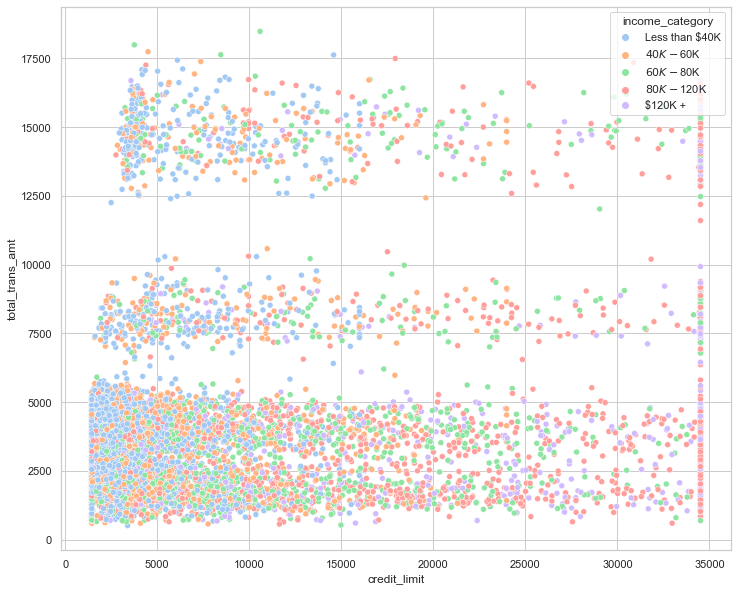

In [107]:
plot_scatter(df, 'credit_limit', 'total_trans_amt', 'income_category', '')

### Is the any correlation between months on book and months inactive?

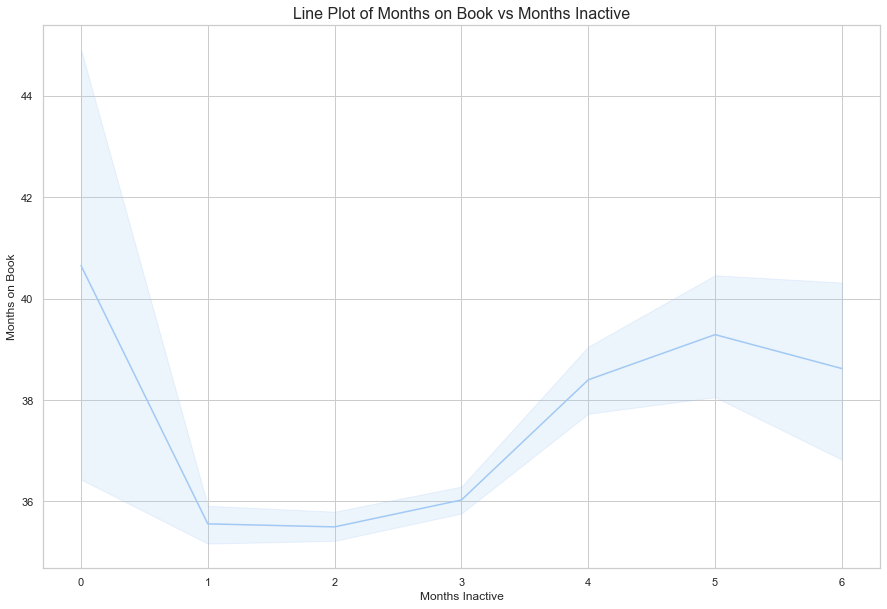

In [108]:
plt.figure(figsize=(15,10))
sns.lineplot(x='months_inactive_12_mon', y='months_on_book', data=df)
plt.title("Line Plot of Months on Book vs Months Inactive", fontsize=16)
plt.xlabel("Months Inactive")
plt.ylabel("Months on Book")
plt.show()

### In this line graph, we can't note any trend between these two variables.

### Is there any relation between customer age and income?

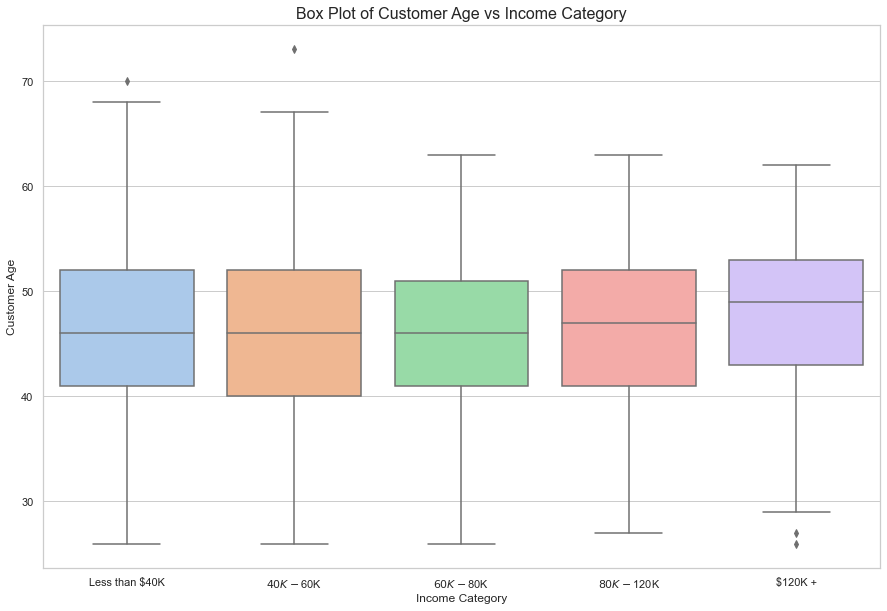

In [109]:
plt.figure(figsize=(15,10))
sns.boxplot(x='income_category', y='customer_age', data=df)
plt.title("Box Plot of Customer Age vs Income Category", fontsize=16)
plt.xlabel("Income Category")
plt.ylabel("Customer Age")
plt.show()

In [110]:
df.groupby('income_category')['customer_age'].describe()

,count,mean,std,min,25%,50%,75%,max
income_category,,,,,,,,
Less than $40K,3561.0,46.297950,8.446741,26.0,41.0,46.0,52.0,70.0
$40K - $60K,1790.0,46.087151,8.434617,26.0,40.0,46.0,52.0,73.0
$60K - $80K,1402.0,45.968616,7.520167,26.0,41.0,46.0,51.0,63.0
$80K - $120K,1535.0,46.428013,6.857736,27.0,41.0,47.0,52.0,63.0
$120K +,727.0,47.603851,6.769921,26.0,43.0,49.0,53.0,62.0


### There doesn't appear to be any correlation between income category and customer age.

In [111]:
df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
3,717296808,Existing Customer,1,Blue,56,3,2,3006.0,489.0,0.837,67,F,Graduate,Married,Less than $40K,4,2517,2.053,1661,1.000,32
4,809164083,Existing Customer,1,Blue,56,1,2,2619.0,840.0,0.679,63,M,Graduate,Married,$40K - $60K,2,1779,1.259,1450,0.947,37


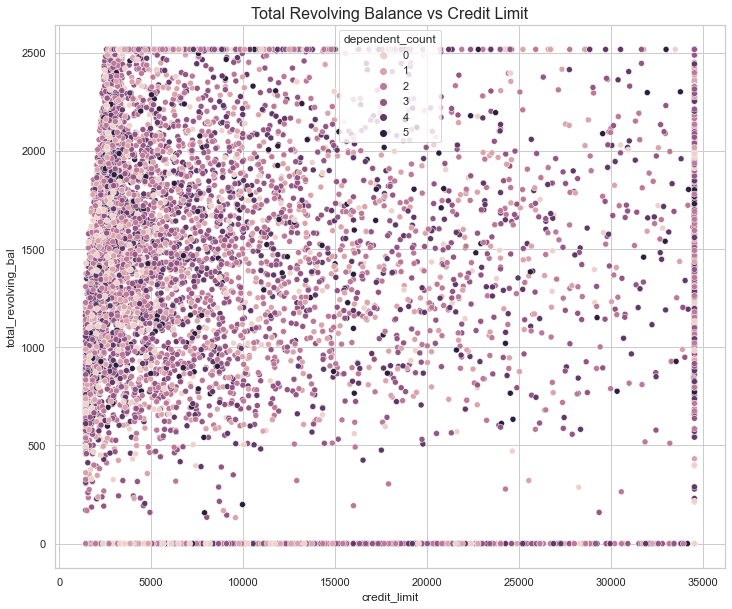

In [112]:
plot_scatter(df, 'credit_limit', 'total_revolving_bal', 'dependent_count', 'Total Revolving Balance vs Credit Limit')

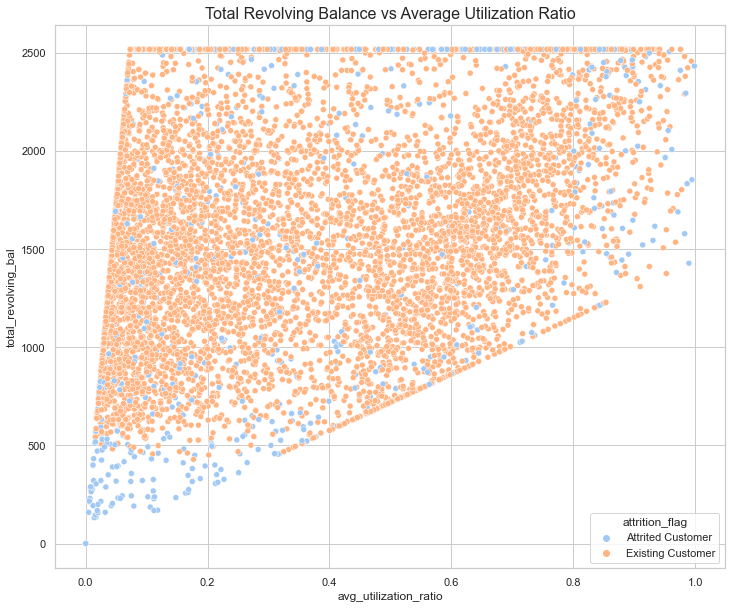

In [113]:
plot_scatter(df, 'avg_utilization_ratio', 'total_revolving_bal', 'attrition_flag', 'Total Revolving Balance vs Average Utilization Ratio')

### Scatter plots of these metrics don't give much insight here.

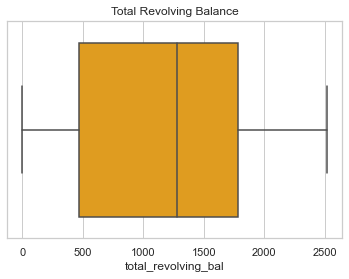

In [114]:
make_box(df, 'total_revolving_bal', 'orange', 'Total Revolving Balance');

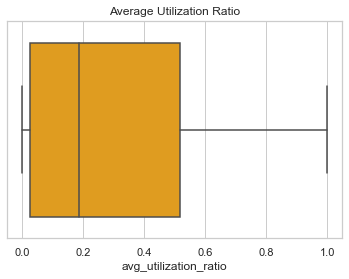

In [115]:
make_box(df, 'avg_utilization_ratio', 'orange', 'Average Utilization Ratio');

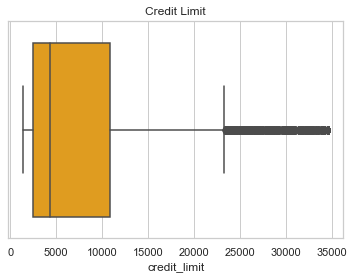

In [116]:
make_box(df, 'credit_limit', 'orange', 'Credit Limit');

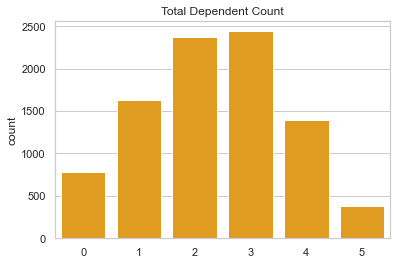

In [117]:
make_cnt(df, 'dependent_count', 'orange', 'Total Dependent Count', 0);

- Dependency count follows a normal distribution

In [118]:
df.dependent_count.describe()

count    9015.000000
mean        2.354964
std         1.295146
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: dependent_count, dtype: float64

In [119]:
df.credit_limit.describe()

count     9015.000000
mean      8522.834764
std       9132.702996
min       1438.300000
25%       2505.500000
50%       4331.000000
75%      10808.000000
max      34516.000000
Name: credit_limit, dtype: float64

In [120]:
mysql("SELECT count(avg_utilization_ratio) FROM df_complete WHERE avg_utilization_ratio = 0;")

,count(avg_utilization_ratio)
0,2167


In [121]:
mysql("SELECT count(avg_utilization_ratio) FROM df_complete WHERE avg_utilization_ratio != 0;")

,count(avg_utilization_ratio)
0,6848


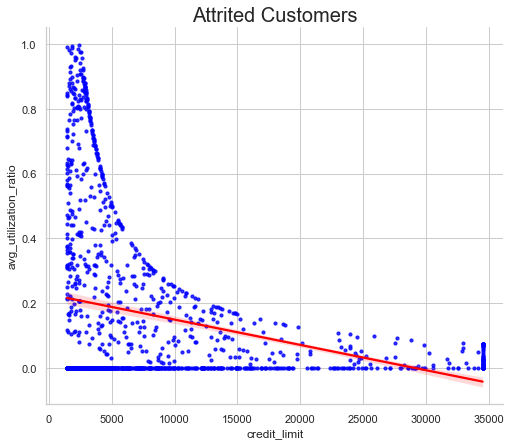

In [146]:
# Filter the dataframe to get only attrited customers
attrited_df = df[df['attrition_flag'] == "Attrited Customer"]

sns.lmplot(x='credit_limit', y='avg_utilization_ratio', data=attrited_df, scatter_kws={'color': 'blue', 's' : 10}, line_kws={'color': 'red'}, height=6, aspect=1.2)
plt.title("Attrited Customers", fontsize=20)
plt.show()



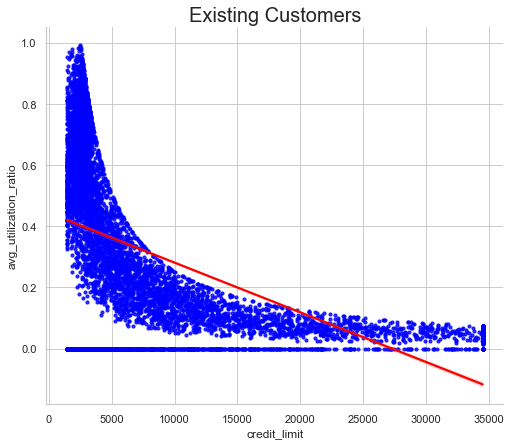

In [147]:
# Filter the dataframe to get only existing customers
existing_df = df[df['attrition_flag'] == "Existing Customer"]

sns.lmplot(x='credit_limit', y='avg_utilization_ratio', data=existing_df, scatter_kws={'color': 'blue', 's' : 10}, line_kws={'color': 'red'}, height=6, aspect=1.2)
plt.title("Existing Customers", fontsize=20)
plt.show()


### These linear model plots of credit limits and use ratio separated by existing and attrited customers show that existing customers have a slightly steeper regression line.

In [124]:
df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
3,717296808,Existing Customer,1,Blue,56,3,2,3006.0,489.0,0.837,67,F,Graduate,Married,Less than $40K,4,2517,2.053,1661,1.000,32
4,809164083,Existing Customer,1,Blue,56,1,2,2619.0,840.0,0.679,63,M,Graduate,Married,$40K - $60K,2,1779,1.259,1450,0.947,37


In [125]:
def plot_boxplots(df, y1, y2, title1, title2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.boxplot(x='attrition_flag', y=y1, data=df, ax=ax[0])
    ax[0].set_title(title1, fontsize=16)

    sns.boxplot(x='attrition_flag', y=y2, data=df, ax=ax[1])
    ax[1].set_title(title2, fontsize=16)
    plt.show()

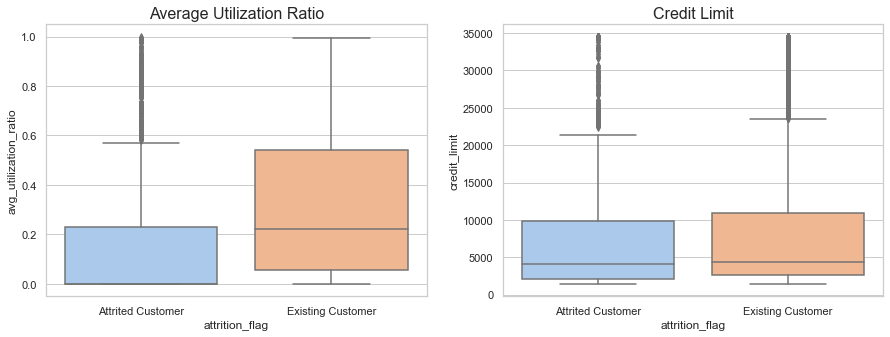

In [126]:
plot_boxplots(df, 'avg_utilization_ratio', 'credit_limit', 'Average Utilization Ratio', 'Credit Limit')

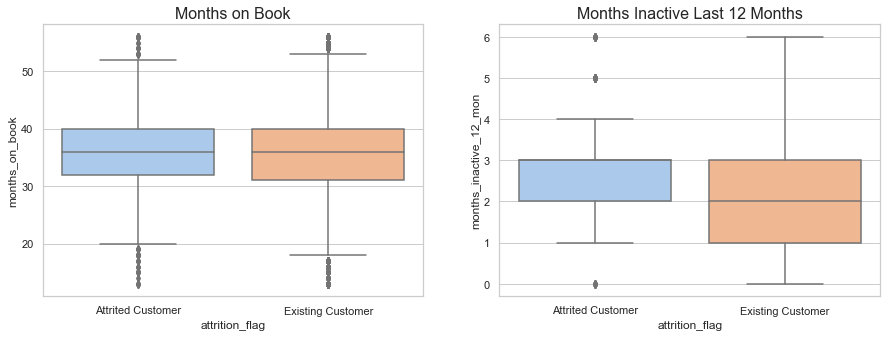

In [127]:
plot_boxplots(df, 'months_on_book', 'months_inactive_12_mon', 'Months on Book', 'Months Inactive Last 12 Months')

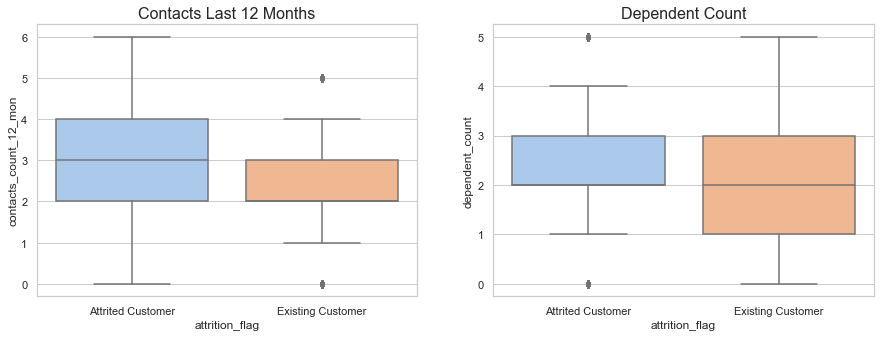

In [128]:
plot_boxplots(df, 'contacts_count_12_mon', 'dependent_count', 'Contacts Last 12 Months', 'Dependent Count')

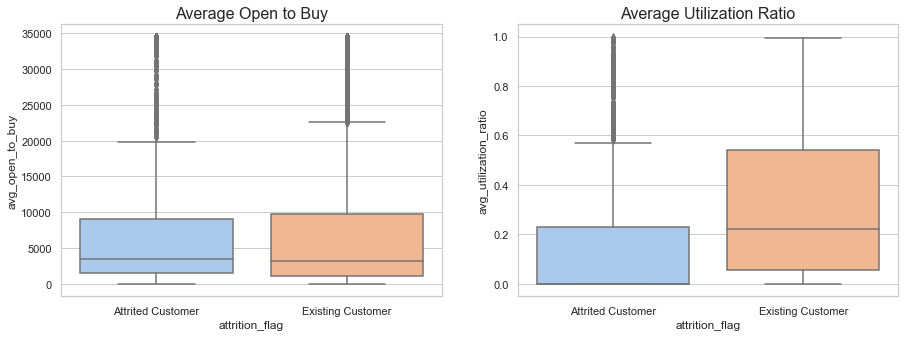

In [129]:
plot_boxplots(df, 'avg_open_to_buy', 'avg_utilization_ratio', 'Average Open to Buy', 'Average Utilization Ratio')

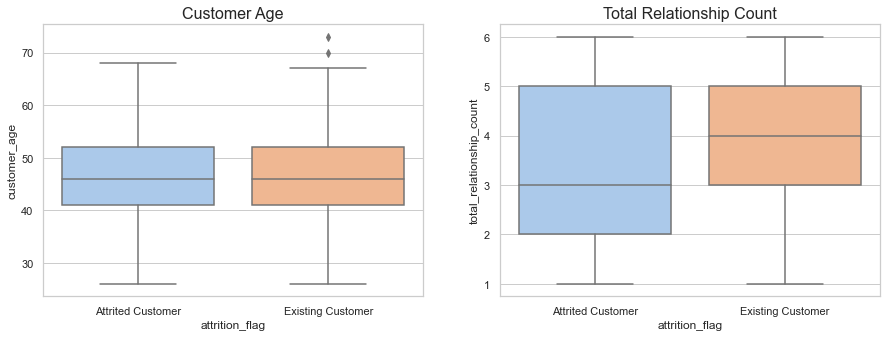

In [130]:
plot_boxplots(df, 'customer_age', 'total_relationship_count', 'Customer Age', 'Total Relationship Count')

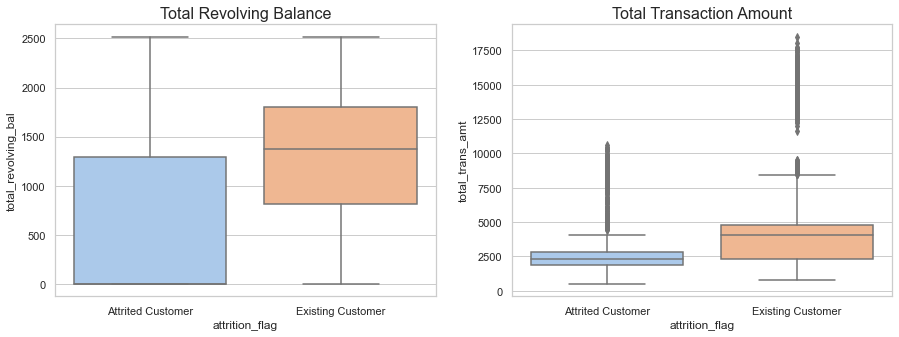

In [131]:
plot_boxplots(df, 'total_revolving_bal', 'total_trans_amt', 'Total Revolving Balance', 'Total Transaction Amount')

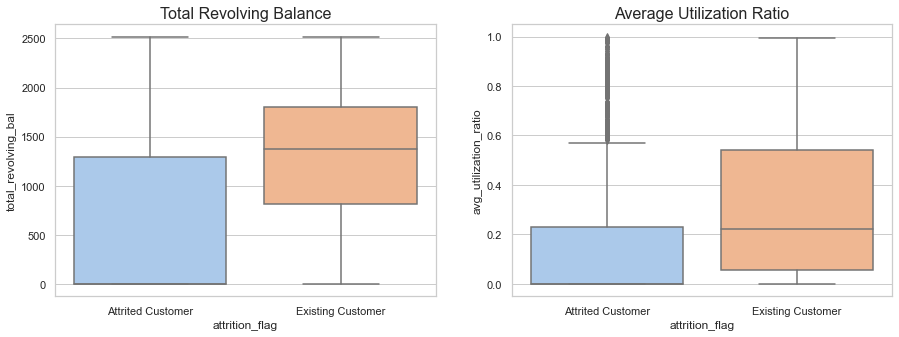

In [132]:
plot_boxplots(df, 'total_revolving_bal', 'avg_utilization_ratio', 'Total Revolving Balance', 'Average Utilization Ratio')

### The above box plots compare existing customer with attrited customers against a variety of metrics. Notable differences occur across Utilization Ratio and Revolving Balance.

In [133]:
columns = df.columns
for col in columns:
    print("Descriptive statistics for column:", col)
    print(df.groupby('attrition_flag')[col].describe())
    print("\n")

Descriptive statistics for column: clientnum
                    count          mean           std          min  \
attrition_flag                                                       
Attrited Customer  1440.0  7.356109e+08  3.561422e+07  708083283.0   
Existing Customer  7575.0  7.400902e+08  3.714605e+07  708082083.0   

                            25%          50%           75%          max  
attrition_flag                                                           
Attrited Customer  7.124740e+08  716678920.5  7.694729e+08  828294933.0  
Existing Customer  7.132157e+08  718192608.0  7.783763e+08  828343083.0  


Descriptive statistics for column: attrition_flag
                  count unique                top  freq
attrition_flag                                         
Attrited Customer  1440      1  Attrited Customer  1440
Existing Customer  7575      1  Existing Customer  7575


Descriptive statistics for column: dependent_count
                    count      mean       std  mi

# Conclusions & Recommendations

## The results of the demographic analysis showed no unusual trends. It was observed that higher income categories had higher spending and credit limits, which is a logical finding.

## When comparing attrited customers to existing customers, we can clearly see that attrited customers had less money in the bank and had a lower credit use ratio. This means that customers with less money in their accounts also used less credit and were more likely to leave the services of the bank.  This could be a motivator for customer attrition but further analysis is necessary.

## One notable statistic was the perfect positive correlation between credit limit and average remaining credit. This may suggest that the bank is granting credit where it is not necessary or that the interest rates for credit may be discouraging customers from taking out large amounts. To address this issue, the bank should re-evaluate its credit policies and consider implementing marketing and promotion strategies for credit lines to encourage customer usage.

## After analyzing the data, no truly significant correlations were found for the churn rate. This is not surprising as customer churn can be influenced by a variety of factors, and these variables may not be the most relevant or indicative of the underlying causes, especially as no customer experience data is available. To gain a better understanding of the reasons behind churn, it is recommended to acquire additional data for further analysis.

# Data Enrichment - If I had unlimited resources, what additional data would I use to analyse this dataset?

- Data about whether loans were repaid late and how late the repayment was made. I would use this information to compare against the different demographics and especially how many dependents the customer has. This would be important information for the bank regarding risk analysis.

- A time dimension would be very useful in this dataset. For example, date the client joined the bank. This could be used to look at common trends for the best time of year to advertise to customers. Another time dimension could be when the customer left the bank to see if there are any trends there.

- Customer location demographic data would be great to see where the banks customers are concentrated and which locations have higher credit usage.

- Survey data from the clients themselves, such as general happiness with bank services, reasons for leaving (preset choices). This could be useful especially when analyzing churn rate.